# Credit Scoring

**Loading csv files**

In [1]:
CRDT <- read.csv("data/DATA_3.01_CREDIT.csv")
head(CRDT)

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
,<dbl>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<int>
1,14.891,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,514,4,71,11,Male,No,No,Asian,580
4,148.924,681,3,36,11,Female,No,No,Asian,964
5,55.882,357,2,68,16,Male,No,Yes,Caucasian,331
6,80.180,569,4,77,10,Male,No,No,Caucasian,1151


**Exploring the Data**

In [2]:
str(CRDT)

'data.frame':	300 obs. of  10 variables:
 $ Income   : num  14.9 106 104.6 148.9 55.9 ...
 $ Rating   : int  283 483 514 681 357 569 259 512 266 491 ...
 $ Cards    : int  2 3 4 3 2 4 2 2 5 3 ...
 $ Age      : int  34 82 71 36 68 77 37 87 66 41 ...
 $ Education: int  11 15 11 11 16 10 12 9 13 19 ...
 $ Gender   : Factor w/ 2 levels " Male","Female": 1 2 1 2 1 1 2 1 2 2 ...
 $ Student  : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 1 1 1 2 ...
 $ Married  : Factor w/ 2 levels "No","Yes": 2 2 1 1 2 1 1 1 1 2 ...
 $ Ethnicity: Factor w/ 3 levels "African American",..: 3 2 2 2 3 3 1 2 3 1 ...
 $ Balance  : int  333 903 580 964 331 1151 203 872 279 1350 ...


In [3]:
summary(CRDT)

     Income           Rating          Cards            Age       
 Min.   : 10.35   Min.   : 93.0   Min.   :1.000   Min.   :24.00  
 1st Qu.: 21.03   1st Qu.:235.0   1st Qu.:2.000   1st Qu.:41.00  
 Median : 33.12   Median :339.0   Median :3.000   Median :55.00  
 Mean   : 44.05   Mean   :348.1   Mean   :3.027   Mean   :54.98  
 3rd Qu.: 55.98   3rd Qu.:433.0   3rd Qu.:4.000   3rd Qu.:69.00  
 Max.   :186.63   Max.   :949.0   Max.   :8.000   Max.   :91.00  
   Education        Gender    Student   Married              Ethnicity  
 Min.   : 5.00    Male :132   No :268   No :117   African American: 78  
 1st Qu.:11.00   Female:168   Yes: 32   Yes:183   Asian           : 81  
 Median :14.00                                    Caucasian       :141  
 Mean   :13.39                                                          
 3rd Qu.:16.00                                                          
 Max.   :20.00                                                          
    Balance       
 Min.   

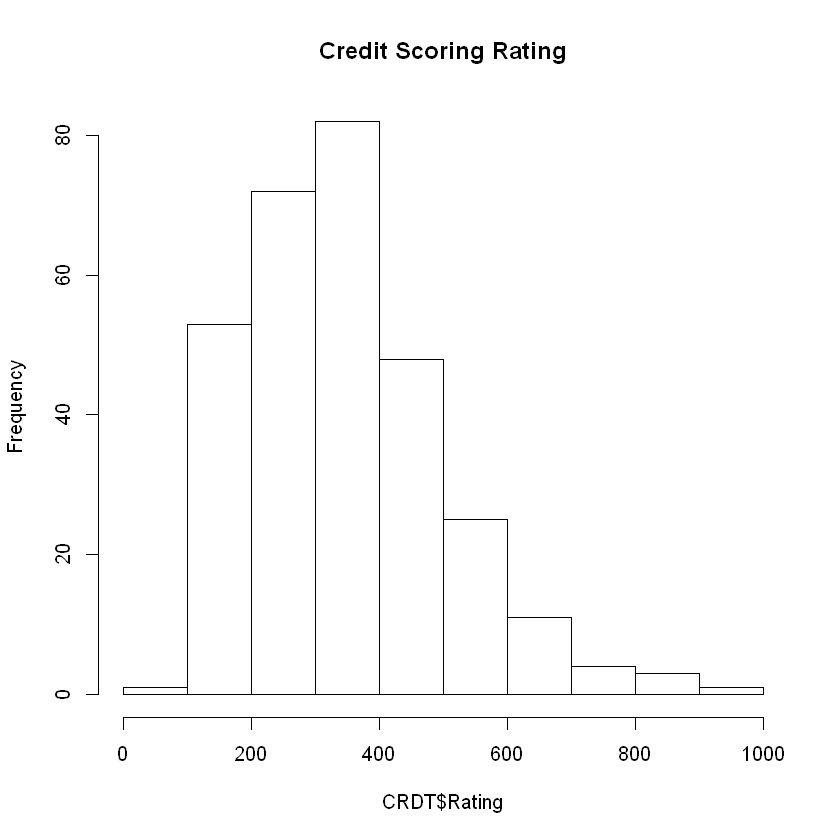

In [4]:
# Histogram of the credit score
hist(CRDT$Rating, main = "Credit Scoring Rating")

In [5]:
# Compute the correlation between all the numerical variables of the sample
cor(CRDT[,c(1:5,10)]) 

,Income,Rating,Cards,Age,Education,Balance
Income,1.00000000,0.77116741,0.02887452,0.12320067,-0.07095917,0.43232667
Rating,0.77116741,1.00000000,0.09585441,0.04237663,-0.09543257,0.85982866
Cards,0.02887452,0.09585441,1.00000000,0.05465525,0.01517640,0.12384602
Age,0.12320067,0.04237663,0.05465525,1.00000000,-0.04617816,-0.05242587
Education,-0.07095917,-0.09543257,0.01517640,-0.04617816,1.00000000,-0.07316655
Balance,0.43232667,0.85982866,0.12384602,-0.05242587,-0.07316655,1.00000000


In [6]:
# Estimate a linear regression model of Rating as a function of everything else.
linreg=lm(Rating~.,data=CRDT)

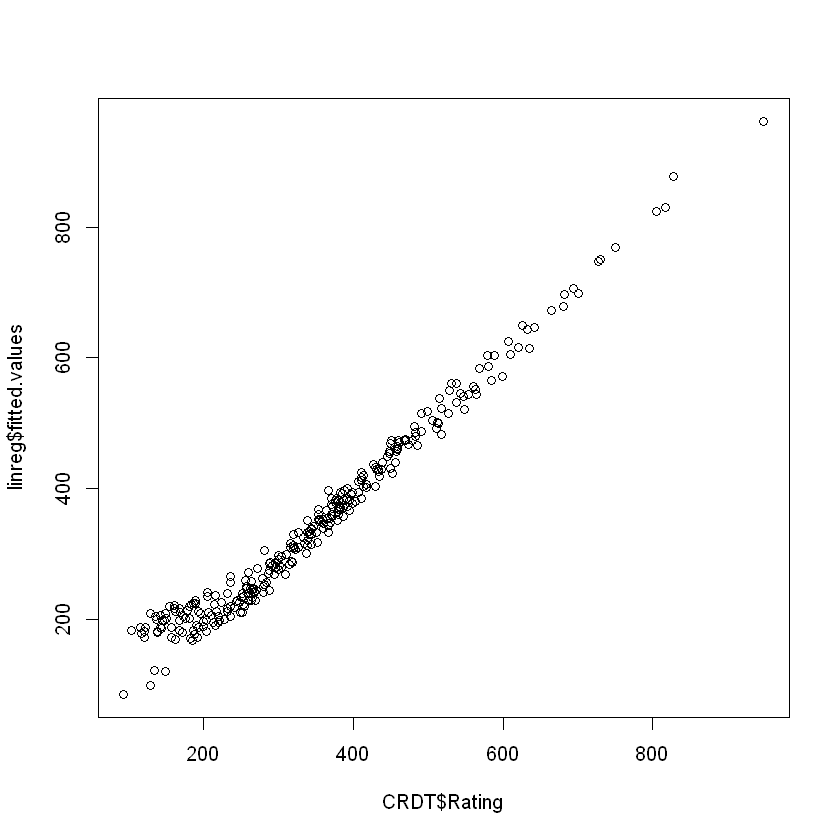

In [7]:
# Plot the fitted values vs. the actual ones
plot(CRDT$Rating,linreg$fitted.values) 

In [8]:
# Computes the correlation between the fitted values and the actual ones
cor(linreg$fitted.values,CRDT$Rating) 

[1] 0.9867324

The correlation coefficient is almost 0.99. Although the model might be off with the lower values. Note: A more rigorous approach would be to estimate the accuracy on 'out-of-sample' data (i.e., a test set).

Now that we are confident with our model, let's see the results of the regression model:

In [9]:
summary(linreg)


Call:
lm(formula = Rating ~ ., data = CRDT)

Residuals:
    Min      1Q  Median      3Q     Max 
-81.316 -10.820   4.875  16.588  43.501 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        140.881377   9.666167  14.575   <2e-16 ***
Income               2.094703   0.048118  43.533   <2e-16 ***
Cards               -0.762853   1.079874  -0.706   0.4805    
Age                  0.144603   0.085872   1.684   0.0933 .  
Education            0.179388   0.473743   0.379   0.7052    
GenderFemale         1.770375   2.917842   0.607   0.5445    
StudentYes         -98.804778   4.959789 -19.921   <2e-16 ***
MarriedYes           3.176873   3.005535   1.057   0.2914    
EthnicityAsian      -4.428289   4.006859  -1.105   0.2700    
EthnicityCaucasian  -1.250612   3.533864  -0.354   0.7237    
Balance              0.231363   0.003661  63.189   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.91 on 

The statistically significant variable (* * *) are the income, studentyes and balance. Thanks to the absolute value of the t-value, we can rank the importance of variables: 1/ balance, 2/income, 3/ studentyes. We consider an effect to be significant when the p-value is smaller than 0.05. Otherwise, the variable has no significant effect on the expected credit score.

Then, we use the sign of 'estimate' to conlude on the direction of the effect:

    Positive : as the variable increases, the expected credit score increases, everything else being equal
    
    Negative: as the variable increases, the expected credit score decreases, everything else being equal We can say that the fact the applicant is a student impacts negatively its credit score, everything else being equal. Also, the higher the balance, the higher the credit score. Same for the income. Note: positive coefficient indicates a positive impact on the outcome variable 'rating' (and vice-versa)
    
Now,to present our findings to a business audience, we could use a model-free approach. We can start with plotting the credit score as a function of the balance (which is the most important driver):

In [10]:
library(ggplot2)

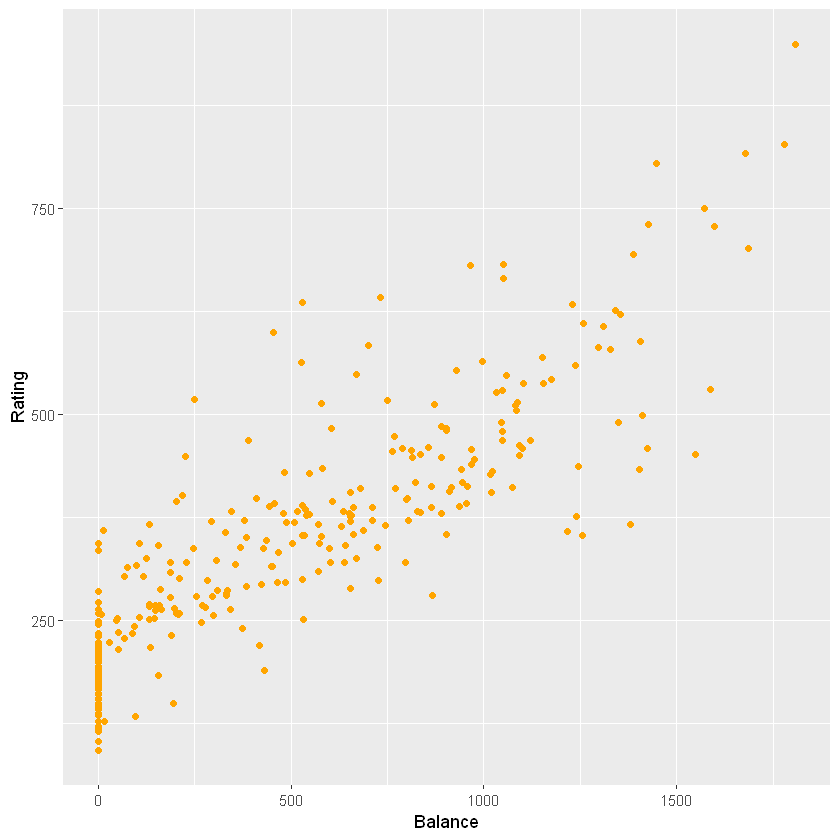

In [11]:
ggplot(data=CRDT, aes(x=Balance,y=Rating)) + 
  geom_point(color='orange') +
  xlab("Balance") +
  ylab("Rating")

# plot(CRDT$Balance,CRDT$Rating)

As expected, the slope is positive. And indeed, the higher the balance, the higher the rating.

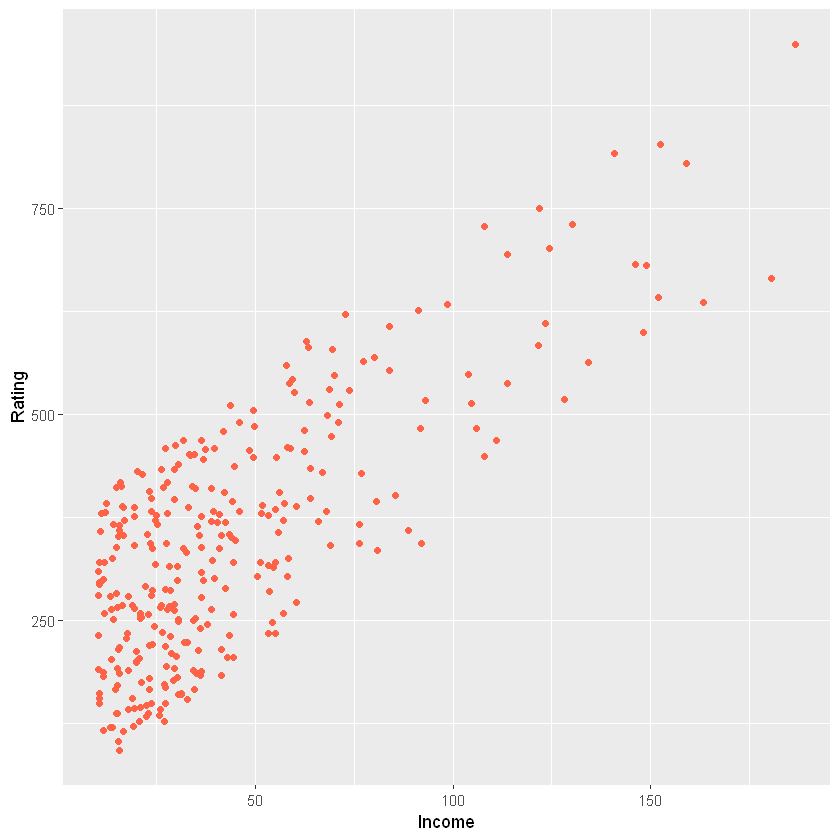

In [12]:
ggplot(data=CRDT, aes(x=Income,y=Rating)) + 
  geom_point(color='tomato') +
  xlab("Income") +
  ylab("Rating")

# plot(CRDT$Income,CRDT$Rating)

As expected, the higher the income, the higher the rating.